# Лабораторная 2

Первый датасет: Набор данных для анализа и прогнозирования сердечного приступа (https://www.kaggle.com/datasets/kamilpytlak/personal-key-indicators-of-heart-disease)

In [104]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df_heart = pd.read_csv("..\\static\\csv\\heart_2020_cleaned.csv")
print(df_heart.columns)

Index(['HeartDisease', 'BMI', 'Smoking', 'AlcoholDrinking', 'Stroke',
       'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory',
       'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'SleepTime',
       'Asthma', 'KidneyDisease', 'SkinCancer'],
      dtype='object')


Столбцы на русском:

HeartDisease - сердечный приступ \
BMI - ИМТ \
Smoking - курящий ли человек \
AlcoholDrinking - выпивающий ли человек\
Stroke - был ли инсульт\
PhysicalHealth - физическое здоровье\
MentalHealth - ментальное здоровье\
DiffWalking - проблемы с ходьбой\
Sex - пол\
AgeCategory - возрастная категория\
Race - раса\
Diabetic - диабетик ли человек\
PhysicalActivity - физическая активность\
GenHealth - общее здоровье\
SleepTime - время сна\
Asthma - астматик ли человек\
KidneyDisease - нефропатия\
SkinCancer - рак кожи

In [105]:
df_heart.info()
df_heart.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

HeartDisease    BMI Smoking AlcoholDrinking Stroke  PhysicalHealth  \
0           No  16.60     Yes              No     No             3.0   
1           No  20.34      No              No    Yes             0.0   
2           No  26.58     Yes              No     No            20.0   
3           No  24.21      No              No     No             0.0   
4           No  23.71      No              No     No            28.0   

   MentalHealth DiffWalking     Sex  AgeCategory   Race Diabetic  \
0          30.0          No  Female        55-59  White      Yes   
1           0.0          No  Female  80 or older  White       No   
2          30.0          No    Male        65-69  White      Yes   
3           0.0          No  Female        75-79  White       No   
4           0.0         Yes  Female        40-44  White       No   

  PhysicalActivity  GenHealth  SleepTime Asthma KidneyDisease SkinCancer  
0              Yes  Very good        5.0    Yes            No        Yes  
1              Yes  Very good        7.0     No            No         No  
2              Yes       Fair        8.0    Yes            No         No  
3               No       Good        6.0     No            No        Yes  
4              Yes  Very good        8.0     No            No         No

Объект наблюдения: состояние человека\
Атрибуты объектов: сердечная недостаточность, ИМТ, курящий человек или нет, выпивающий человек или нет, был ли инсульт у человека и т.д.

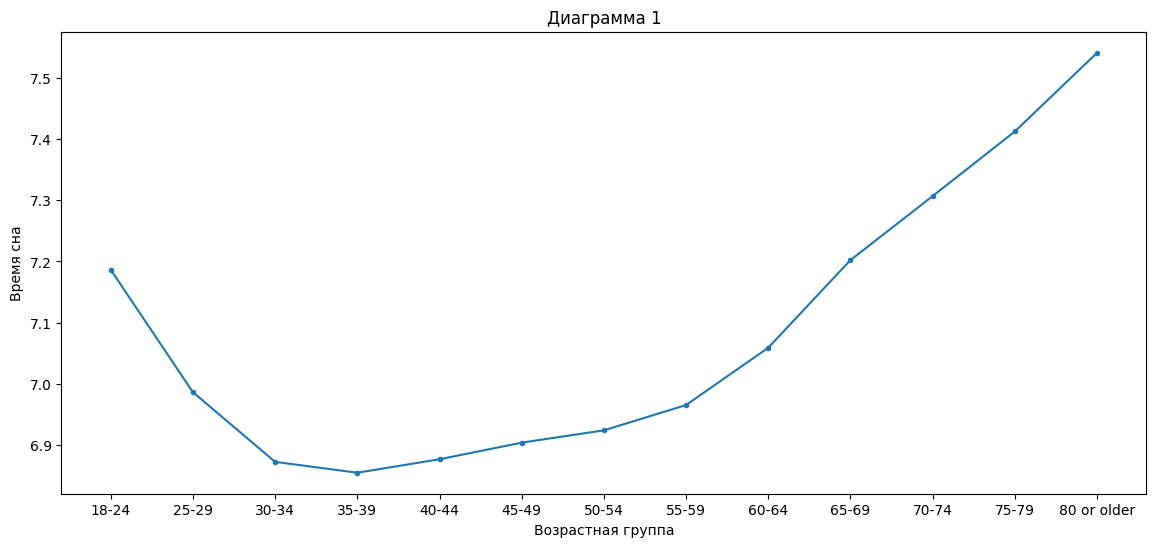

In [106]:
mean_menthalhealth = df_heart.groupby('AgeCategory')['SleepTime'].mean().reset_index()

plt.figure(figsize=(14, 6))

plt.plot(mean_menthalhealth['AgeCategory'], mean_menthalhealth['SleepTime'], marker='.')

plt.title("Диаграмма 1")
plt.xlabel("Возрастная группа")
plt.ylabel("Время сна")

plt.show()

Между атрибутами присутствует связь. Пример, на диаграмме 1 - связь между возрастной группой и временем сна\
Примеры бизнес-целей:\
    1. Прогнозирование инсульта на основе ИМТ.\
    2. Наблюдение за изменением времени сна в зависимости от возраста.\
\
Эффект для бизнеса: влияние количества сна на здоровье, влияние ИМТ на здоровье, влияние возраста на инсульты\
\
\
Цели технического проекта:\
    1. Первая бизнес-цель: вход - ИМТ, целевой признак - инсульт.\
    2. Вторая бизнес-цель: вход - возрастная группа, целевой признак - время сна.

Проверка на выбросы

In [217]:
null_values = df_heart.isnull().sum()
print("Пустые значения по столбцам:")
print(null_values)

duplicates = df_heart.duplicated().sum()
print(f"\nКоличество дубликатов: {duplicates}")

print("\nСтатистический обзор данных:")
df_heart.describe()

Пустые значения по столбцам:
HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64

Количество дубликатов: 18078

Статистический обзор данных:


BMI  PhysicalHealth   MentalHealth      SleepTime
count  319795.000000    319795.00000  319795.000000  319795.000000
mean       28.325399         3.37171       3.898366       7.097075
std         6.356100         7.95085       7.955235       1.436007
min        12.020000         0.00000       0.000000       1.000000
25%        24.030000         0.00000       0.000000       6.000000
50%        27.340000         0.00000       0.000000       7.000000
75%        31.420000         2.00000       3.000000       8.000000
max        94.850000        30.00000      30.000000      24.000000

На основе полученной информации видно, что пустых данных нет, но есть дубликаты. Удалим их и проверим данные на выбросы:

In [236]:
cleaned_df = df_heart.drop_duplicates()

for column in df_heart.select_dtypes(include=[np.number]).columns:
    skewness = df_heart[column].skew()
    print(f"\nКоэффициент асимметрии для столбца '{column}': {skewness}")



Коэффициент асимметрии для столбца 'BMI': 1.3324306428979513

Коэффициент асимметрии для столбца 'PhysicalHealth': 2.6039732622480822

Коэффициент асимметрии для столбца 'MentalHealth': 2.331111549136165

Коэффициент асимметрии для столбца 'SleepTime': 0.6790346208011537


Выбросы незначительные. Очистка данных от шумов

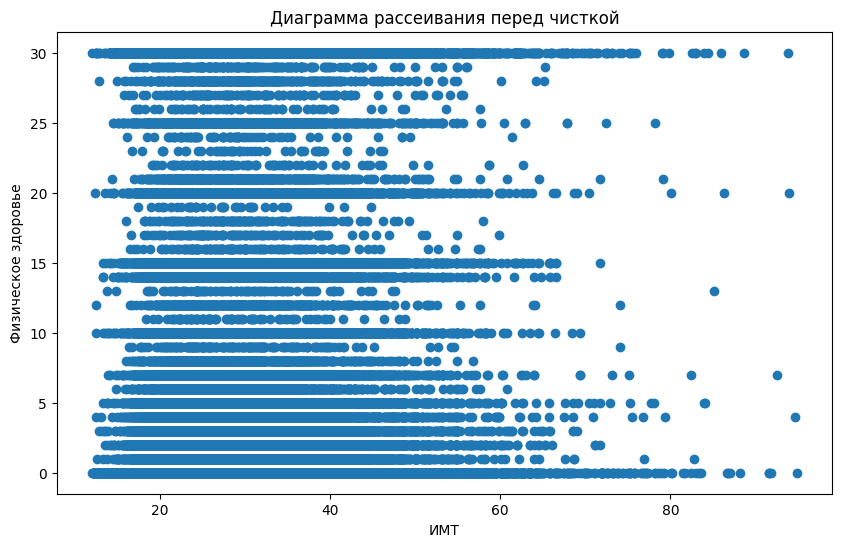

Выбросы в датасете:
       HeartDisease    BMI Smoking AlcoholDrinking Stroke  PhysicalHealth  \
32               No  45.35      No              No     No            30.0   
57               No  46.52     Yes              No     No            30.0   
90               No  44.29      No              No     No            30.0   
105              No  58.54      No              No     No            30.0   
107              No  45.42      No              No     No             0.0   
...             ...    ...     ...             ...    ...             ...   
319636           No  47.55      No              No     No             0.0   
319693           No  44.29      No              No     No             0.0   
319709           No  51.46     Yes              No     No            30.0   
319725           No  53.16      No              No     No            29.0   
319794           No  46.56      No              No     No             0.0   

        MentalHealth DiffWalking     Sex  AgeCategory  

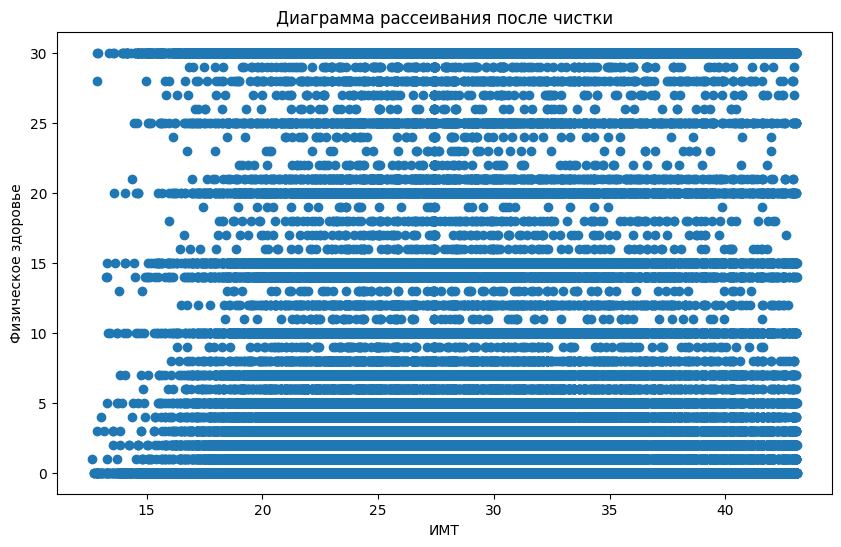

In [237]:
plt.figure(figsize=(10, 6))
plt.scatter(cleaned_df['BMI'], cleaned_df['PhysicalHealth'])
plt.xlabel('ИМТ')
plt.ylabel('Физическое здоровье')
plt.title('Диаграмма рассеивания перед чисткой')
plt.show()

Q1 = cleaned_df["BMI"].quantile(0.25)
Q3 = cleaned_df["BMI"].quantile(0.75)

IQR = Q3 - Q1

threshold = 1.5 * IQR
lower_bound = Q1 - threshold
upper_bound = Q3 + threshold

outliers = (cleaned_df["BMI"] < lower_bound) | (cleaned_df["BMI"] > upper_bound)

print("Выбросы в датасете:")
print(cleaned_df[outliers])

median_score = cleaned_df["BMI"].median()
cleaned_df.loc[outliers, "BMI"] = median_score

plt.figure(figsize=(10, 6))
plt.scatter(cleaned_df['BMI'], cleaned_df['PhysicalHealth'])
plt.xlabel('ИМТ')
plt.ylabel('Физическое здоровье')
plt.title('Диаграмма рассеивания после чистки')
plt.show()


Разбиение набора данных на обучающую, контрольную и тестовую выборки

In [238]:
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(cleaned_df, test_size=0.2, random_state=42)

train_df, val_df = train_test_split(train_df, test_size=0.25, random_state=42)

print("Размер обучающей выборки:", len(train_df))
print("Размер контрольной выборки:", len(val_df))
print("Размер тестовой выборки:", len(test_df))

Размер обучающей выборки: 181029
Размер контрольной выборки: 60344
Размер тестовой выборки: 60344


In [239]:
def check_balance(df, name):
    counts = df['BMI'].value_counts()
    print(f"Распределение ИМТ в {name}:")
    print(counts)
    print()

check_balance(train_df, "обучающей выборке")
check_balance(val_df, "контрольной выборке")
check_balance(test_df, "тестовой выборке")

Распределение ИМТ в обучающей выборке:
BMI
27.41    5906
26.63    1941
27.46    1456
27.44    1416
27.12    1258
         ... 
17.93       1
34.10       1
23.27       1
13.81       1
28.58       1
Name: count, Length: 2305, dtype: int64

Распределение ИМТ в контрольной выборке:
BMI
27.41    1972
26.63     657
27.46     494
24.41     474
27.44     463
         ... 
16.76       1
19.93       1
38.99       1
35.34       1
32.80       1
Name: count, Length: 1969, dtype: int64

Распределение ИМТ в тестовой выборке:
BMI
27.41    1931
26.63     646
27.44     506
27.46     475
24.41     452
         ... 
34.89       1
30.75       1
41.06       1
39.91       1
20.27       1
Name: count, Length: 1988, dtype: int64



Оверсемплинг и андерсемплинг

In [240]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

def binning(target, bins):
    return pd.qcut(target, q=bins, labels=False)

train_df['BMI_binned'] = binning(train_df['BMI'], bins=2)
val_df['BMI_binned'] = binning(val_df['BMI'], bins=2)
test_df['BMI_binned'] = binning(test_df['BMI'], bins=2)

def oversample(df, target_column):
    X = df.drop(target_column, axis=1)
    y = df[target_column]
    
    oversampler = RandomOverSampler(random_state=42)
    x_resampled, y_resampled = oversampler.fit_resample(X, y)
    
    resampled_df = pd.concat([x_resampled, y_resampled], axis=1) 
    return resampled_df

def undersample(df, target_column):
    X = df.drop(target_column, axis=1)
    y = df[target_column]
    
    undersampler = RandomUnderSampler(random_state=42)
    x_resampled, y_resampled = undersampler.fit_resample(X, y)
    
    resampled_df = pd.concat([x_resampled, y_resampled], axis=1)
    return resampled_df

train_df_oversampled = oversample(train_df, 'BMI_binned')
val_df_oversampled = oversample(val_df, 'BMI_binned')
test_df_oversampled = oversample(test_df, 'BMI_binned')

train_df_undersampled = undersample(train_df, 'BMI_binned')
val_df_undersampled = undersample(val_df, 'BMI_binned')
test_df_undersampled = undersample(test_df, 'BMI_binned')

print("Оверсэмплинг:")
check_balance(train_df_oversampled, "обучающей выборке")
check_balance(val_df_oversampled, "контрольной выборке")
check_balance(test_df_oversampled, "тестовой выборке")

print("Андерсэмплинг:")
check_balance(train_df_undersampled, "обучающей выборке")
check_balance(val_df_undersampled, "контрольной выборке")
check_balance(test_df_undersampled, "тестовой выборке")

Оверсэмплинг:
Распределение ИМТ в обучающей выборке:
BMI
27.41    5906
26.63    1941
27.46    1636
27.44    1595
27.12    1258
         ... 
40.92       1
26.98       1
31.22       1
29.59       1
16.00       1
Name: count, Length: 2305, dtype: int64

Распределение ИМТ в контрольной выборке:
BMI
27.41    1981
26.63     657
27.46     494
24.41     474
27.44     465
         ... 
43.03       1
30.64       1
42.48       1
31.61       1
35.34       1
Name: count, Length: 1969, dtype: int64

Распределение ИМТ в тестовой выборке:
BMI
27.41    1931
26.63     646
27.44     580
27.46     533
24.41     452
         ... 
14.37       1
17.28       1
18.04       1
35.98       1
17.41       1
Name: count, Length: 1988, dtype: int64

Андерсэмплинг:
Распределение ИМТ в обучающей выборке:
BMI
27.41    5173
26.63    1708
27.46    1456
27.44    1416
27.12    1104
         ... 
35.27       1
42.80       1
28.58       1
34.10       1
38.83       1
Name: count, Length: 2282, dtype: int64

Распределение ИМТ 

Датасет: Цены на мобильные устройства (https://www.kaggle.com/datasets/dewangmoghe/mobile-phone-price-prediction)

In [241]:
df_phones = pd.read_csv("..\\static\\csv\\mobile-phone-price-prediction.csv")

print(df_phones.columns)

Index(['Unnamed: 0', 'Name', 'Rating', 'Spec_score', 'No_of_sim', 'Ram',
       'Battery', 'Display', 'Camera', 'External_Memory', 'Android_version',
       'Price', 'company', 'Inbuilt_memory', 'fast_charging',
       'Screen_resolution', 'Processor', 'Processor_name'],
      dtype='object')


Столбцы на русском:

Unnamed: 0 - идентификатор \
Name - Модель \
Rating - Рейтинг \
Spec_score - Оценка характеристик\
No_of_sim - Доступние сим-карты\
Ram - Объем оперативной памяти\
Battery - Батарея\
Display - Размер дисплея\
Camera - Камера\
External_Memory - Внешняя память\
Android_version - Версия Android\
Price - Цена\
company - Фирма\
Inbuilt_memory - Встроенная память\
fast_charging - Быстрая зарядка\
Screen_resolution - Разрешение экрана\
Processor - Процессор\
Processor_name - Название процессора

In [242]:
df_phones.info()
df_phones.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1370 entries, 0 to 1369
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         1370 non-null   int64  
 1   Name               1370 non-null   object 
 2   Rating             1370 non-null   float64
 3   Spec_score         1370 non-null   int64  
 4   No_of_sim          1370 non-null   object 
 5   Ram                1370 non-null   object 
 6   Battery            1370 non-null   object 
 7   Display            1370 non-null   object 
 8   Camera             1370 non-null   object 
 9   External_Memory    1370 non-null   object 
 10  Android_version    927 non-null    object 
 11  Price              1370 non-null   object 
 12  company            1370 non-null   object 
 13  Inbuilt_memory     1351 non-null   object 
 14  fast_charging      1281 non-null   object 
 15  Screen_resolution  1368 non-null   object 
 16  Processor          1342 

Unnamed: 0                                  Name  Rating  Spec_score  \
0           0                 Samsung Galaxy F14 5G    4.65          68   
1           1                    Samsung Galaxy A11    4.20          63   
2           2                    Samsung Galaxy A13    4.30          75   
3           3                    Samsung Galaxy F23    4.10          73   
4           4  Samsung Galaxy A03s (4GB RAM + 64GB)    4.10          69   

                       No_of_sim       Ram            Battery     Display  \
0  Dual Sim, 3G, 4G, 5G, VoLTE,   4 GB RAM  6000 mAh Battery   6.6 inches   
1      Dual Sim, 3G, 4G, VoLTE,   2 GB RAM  4000 mAh Battery   6.4 inches   
2      Dual Sim, 3G, 4G, VoLTE,   4 GB RAM  5000 mAh Battery   6.6 inches   
3      Dual Sim, 3G, 4G, VoLTE,   4 GB RAM   6000 mAh Battery  6.4 inches   
4      Dual Sim, 3G, 4G, VoLTE,   4 GB RAM  5000 mAh Battery   6.5 inches   

                                              Camera  \
0    50 MP + 2 MP Dual Rear &amp; 13 MP Front Camera   
1  13 MP + 5 MP + 2 MP Triple Rear &amp; 8 MP Fro...   
2            50 MP Quad Rear &amp; 8 MP Front Camera   
3           48 MP Quad Rear &amp; 13 MP Front Camera   
4  13 MP + 2 MP + 2 MP Triple Rear &amp; 5 MP Fro...   

                      External_Memory Android_version   Price  company  \
0    Memory Card Supported, upto 1 TB              13   9,999  Samsung   
1  Memory Card Supported, upto 512 GB              10   9,990  Samsung   
2    Memory Card Supported, upto 1 TB              12  11,999  Samsung   
3    Memory Card Supported, upto 1 TB              12  11,999  Samsung   
4    Memory Card Supported, upto 1 TB              11  11,999  Samsung   

    Inbuilt_memory       fast_charging  \
0   128 GB inbuilt   25W Fast Charging   
1    32 GB inbuilt   15W Fast Charging   
2    64 GB inbuilt   25W Fast Charging   
3    64 GB inbuilt                 NaN   
4    64 GB inbuilt   15W Fast Charging   

                               Screen_resolution             Processor  \
0   2408 x 1080 px Display with Water Drop Notch   Octa Core Processor   
1          720 x 1560 px Display with Punch Hole     1.8 GHz Processor   
2   1080 x 2408 px Display with Water Drop Notch       2 GHz Processor   
3                                  720 x 1600 px             Octa Core   
4    720 x 1600 px Display with Water Drop Notch             Octa Core   

  Processor_name  
0    Exynos 1330  
1      Octa Core  
2      Octa Core  
3      Helio G88  
4      Helio P35

Объект наблюдения: телефон\
Атрибуты объектов: название модели, рейтинг, оценка характеристик, сим-карты, оперативная память и т.д.

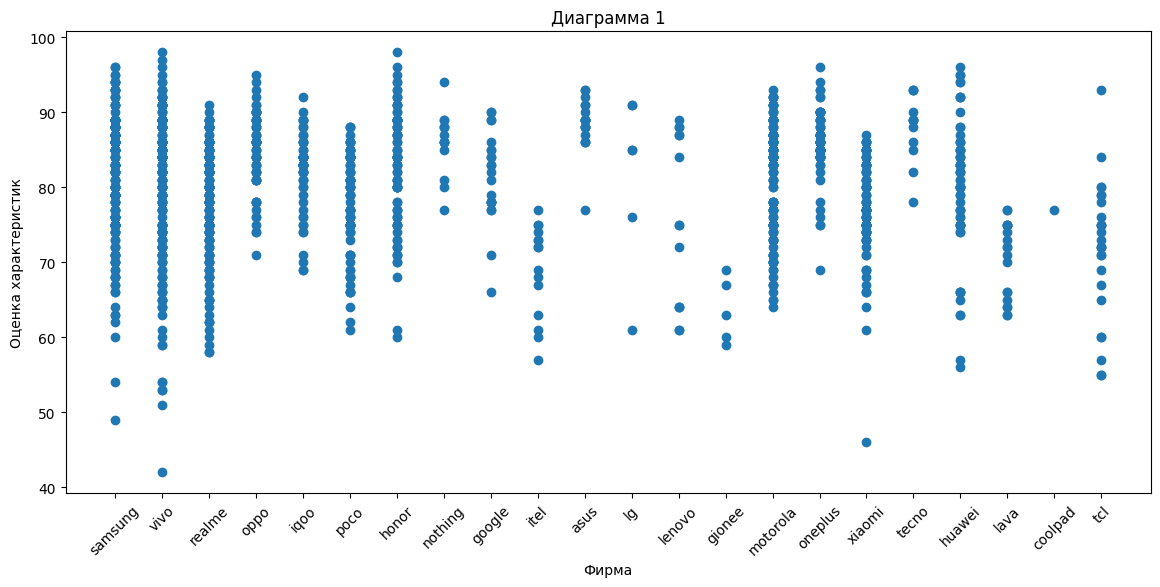

In [243]:
plt.figure(figsize=(14, 6))


plt.scatter(df_phones['company'].str.lower(), df_phones['Spec_score'])
plt.xlabel('Фирма')
plt.ylabel('Оценка характеристик')
plt.xticks(rotation=45)
plt.title('Диаграмма 1')
plt.show()


Между атрибутами присутствует связь. Пример, на диаграмме 1 - связь между фирмой и оценкой характеристик\
Примеры бизнес-целей:\
    1. Прогнозирование цен на основе оценки характеристик\
    2. Прогнозирование оценки характеристик на основе фирмы и цены\
\
Эффект для бизнеса: влияние фирмы на цену, влияние характеристик на рейтинг\
\
\
Цели технического проекта:\
    1. Первая бизнес-цель: вход - оценка характеристик, целевой признак - цена.\
    2. Вторая бизнес-цель: вход - фирма и цена, целевой признак - оценка характеристик.

Проверка на выбросы

In [244]:
null_values = df_phones.isnull().sum()
print("Пустые значения по столбцам:")
print(null_values)

duplicates = df_phones.duplicated().sum()
print(f"\nКоличество дубликатов: {duplicates}")

print("\nСтатистический обзор данных:")
df_phones.describe()

Пустые значения по столбцам:
Unnamed: 0             0
Name                   0
Rating                 0
Spec_score             0
No_of_sim              0
Ram                    0
Battery                0
Display                0
Camera                 0
External_Memory        0
Android_version      443
Price                  0
company                0
Inbuilt_memory        19
fast_charging         89
Screen_resolution      2
Processor             28
Processor_name         0
dtype: int64

Количество дубликатов: 0

Статистический обзор данных:


Unnamed: 0       Rating   Spec_score
count  1370.000000  1370.000000  1370.000000
mean    684.500000     4.374416    80.234307
std     395.629246     0.230176     8.373922
min       0.000000     3.750000    42.000000
25%     342.250000     4.150000    75.000000
50%     684.500000     4.400000    82.000000
75%    1026.750000     4.550000    86.000000
max    1369.000000     4.750000    98.000000

Видим, что есть пустые данные, но нет дубликатов. Удаляем их

In [245]:
def drop_missing_values(dataframe, name):
    before_shape = dataframe.shape 
    cleaned_dataframe = dataframe.dropna()  
    after_shape = cleaned_dataframe.shape 
    print(f"В наборе данных '{name}' было удалено {before_shape[0] - after_shape[0]} строк с пустыми значениями.")
    return cleaned_dataframe

cleaned_df = drop_missing_values(df_phones, "Phones")

В наборе данных 'Phones' было удалено 553 строк с пустыми значениями.


Рассчитаем коэффицент ассиметрии

In [246]:
for column in df_phones.select_dtypes(include=[np.number]).columns:
    skewness = df_phones[column].skew()
    print(f"\nКоэффициент асимметрии для столбца '{column}': {skewness}")


Коэффициент асимметрии для столбца 'Unnamed: 0': 0.0

Коэффициент асимметрии для столбца 'Rating': -0.06697860128699223

Коэффициент асимметрии для столбца 'Spec_score': -0.7393772365886471


Видим, что выбросы незначительные

Очистка данных от шумов

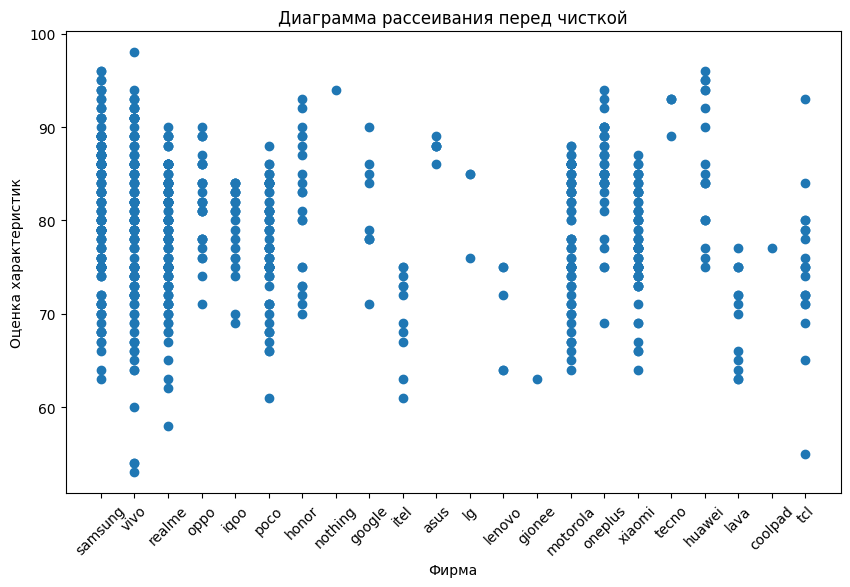

Выбросы в датасете:
      Unnamed: 0                       Name  Rating  Spec_score  \
99            99                   Vivo Y02    4.35          54   
214          214                Realme C30s    4.55          58   
802          802  Vivo Y02 (2GB RAM + 32GB)    4.50          53   
803          803                   Vivo Y02    4.35          54   
1344        1344                    TCL 501    4.25          55   

                      No_of_sim       Ram            Battery      Display  \
99    Dual Sim, 3G, 4G, VoLTE,   3 GB RAM  5000 mAh Battery   6.51 inches   
214   Dual Sim, 3G, 4G, VoLTE,   2 GB RAM  5000 mAh Battery    6.5 inches   
802   Dual Sim, 3G, 4G, VoLTE,   2 GB RAM  5000 mAh Battery   6.51 inches   
803   Dual Sim, 3G, 4G, VoLTE,   3 GB RAM  5000 mAh Battery   6.51 inches   
1344  Dual Sim, 3G, 4G, VoLTE,   2 GB RAM  3000 mAh Battery      6 inches   

                                 Camera                   External_Memory  \
99    8 MP Rear &amp; 5 MP Front Came

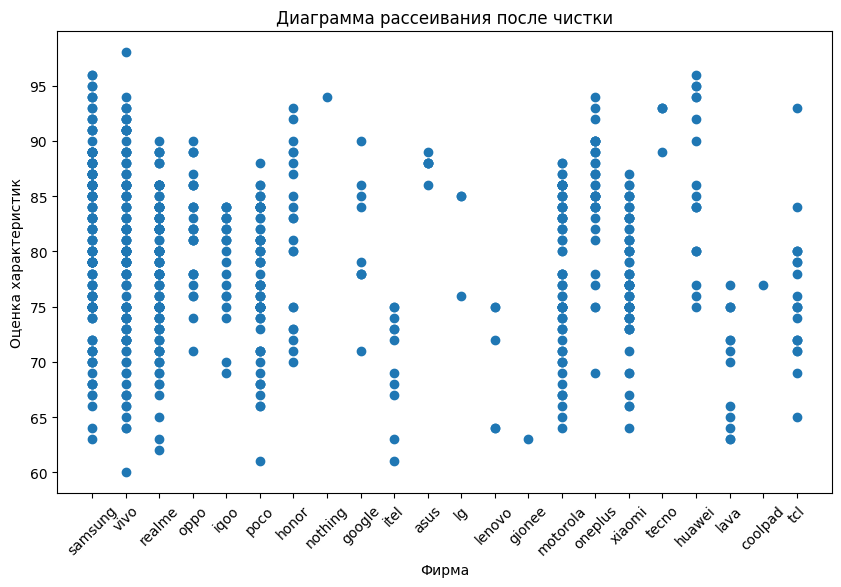

In [247]:
plt.figure(figsize=(10, 6))
plt.scatter(cleaned_df['company'].str.lower(), cleaned_df['Spec_score'])
plt.xlabel('Фирма')
plt.ylabel('Оценка характеристик')
plt.xticks(rotation=45)
plt.title('Диаграмма рассеивания перед чисткой')
plt.show()

Q1 = cleaned_df["Spec_score"].quantile(0.25)
Q3 = cleaned_df["Spec_score"].quantile(0.75)

IQR = Q3 - Q1

threshold = 1.5 * IQR
lower_bound = Q1 - threshold
upper_bound = Q3 + threshold

outliers = (cleaned_df["Spec_score"] < lower_bound) | (cleaned_df["Spec_score"] > upper_bound)

print("Выбросы в датасете:")
print(cleaned_df[outliers])

median_score = cleaned_df["Spec_score"].median()
cleaned_df.loc[outliers, "Spec_score"] = median_score

plt.figure(figsize=(10, 6))
plt.scatter(cleaned_df['company'].str.lower(), cleaned_df['Spec_score'])
plt.xlabel('Фирма')
plt.ylabel('Оценка характеристик')
plt.xticks(rotation=45)
plt.title('Диаграмма рассеивания после чистки')
plt.show()

Разбиение на выборки

In [248]:
train_df, test_df = train_test_split(cleaned_df, test_size=0.2, random_state=42)

train_df, val_df = train_test_split(train_df, test_size=0.25, random_state=42)

print("Размер обучающей выборки:", len(train_df))
print("Размер контрольной выборки:", len(val_df))
print("Размер тестовой выборки:", len(test_df))

print()

def check_balance(df, name):
    counts = df['Spec_score'].value_counts()
    print(f"Распределение оценки характеристик в {name}:")
    print(counts)
    print()

check_balance(train_df, "обучающей выборке")
check_balance(val_df, "контрольной выборке")
check_balance(test_df, "тестовой выборке")

Размер обучающей выборки: 489
Размер контрольной выборки: 164
Размер тестовой выборки: 164

Распределение оценки характеристик в обучающей выборке:
Spec_score
75    48
86    35
80    34
84    32
85    23
78    23
83    23
77    19
79    19
82    18
89    17
88    17
71    16
73    15
72    13
74    13
87    12
69    11
76    10
81    10
67     9
90     9
70     8
68     8
91     8
64     7
93     7
92     6
66     5
94     4
63     4
96     2
95     1
65     1
60     1
61     1
Name: count, dtype: int64

Распределение оценки характеристик в контрольной выборке:
Spec_score
75    18
81    12
74    11
79     9
82     9
85     9
84     8
86     8
76     7
78     7
77     7
83     6
89     5
71     5
72     5
80     4
70     4
88     3
68     3
65     3
73     3
67     2
87     2
63     2
95     2
93     2
90     2
94     1
66     1
92     1
69     1
98     1
61     1
Name: count, dtype: int64

Распределение оценки характеристик в тестовой выборке:
Spec_score
75    15
84    13
76    11
82  

Оверсемплинг и андерсемплинг

In [249]:
train_df_oversampled = oversample(train_df, 'Spec_score')
val_df_oversampled = oversample(val_df, 'Spec_score')
test_df_oversampled = oversample(test_df, 'Spec_score')

train_df_undersampled = undersample(train_df, 'Spec_score')
val_df_undersampled = undersample(val_df, 'Spec_score')
test_df_undersampled = undersample(test_df, 'Spec_score')

print("Оверсэмплинг:")
check_balance(train_df_oversampled, "обучающей выборке")
check_balance(val_df_oversampled, "контрольной выборке")
check_balance(test_df_oversampled, "тестовой выборке")

print("Андерсэмплинг:")
check_balance(train_df_undersampled, "обучающей выборке")
check_balance(val_df_undersampled, "контрольной выборке")
check_balance(test_df_undersampled, "тестовой выборке")

Оверсэмплинг:
Распределение оценки характеристик в обучающей выборке:
Spec_score
85    48
78    48
75    48
82    48
64    48
73    48
79    48
87    48
86    48
80    48
70    48
83    48
68    48
74    48
71    48
72    48
66    48
93    48
77    48
88    48
69    48
89    48
84    48
94    48
76    48
95    48
90    48
63    48
81    48
67    48
91    48
92    48
96    48
65    48
60    48
61    48
Name: count, dtype: int64

Распределение оценки характеристик в контрольной выборке:
Spec_score
75    18
94    18
72    18
82    18
70    18
74    18
68    18
88    18
71    18
80    18
92    18
86    18
66    18
81    18
84    18
79    18
73    18
76    18
67    18
95    18
78    18
85    18
83    18
77    18
89    18
98    18
69    18
90    18
87    18
65    18
63    18
93    18
61    18
Name: count, dtype: int64

Распределение оценки характеристик в тестовой выборке:
Spec_score
80    15
94    15
82    15
77    15
75    15
79    15
96    15
83    15
76    15
71    15
64    15
78    15
8

Датасет: "Удаленная работа и ментальное здоровье" (https://www.kaggle.com/datasets/waqi786/remote-work-and-mental-health)

In [250]:
df_remotework = pd.read_csv("..\\static\\csv\\Impact_of_Remote_Work_on_Mental_Health.csv")

print(df_remotework.columns)

Index(['Employee_ID', 'Age', 'Gender', 'Job_Role', 'Industry',
       'Years_of_Experience', 'Work_Location', 'Hours_Worked_Per_Week',
       'Number_of_Virtual_Meetings', 'Work_Life_Balance_Rating',
       'Stress_Level', 'Mental_Health_Condition',
       'Access_to_Mental_Health_Resources', 'Productivity_Change',
       'Social_Isolation_Rating', 'Satisfaction_with_Remote_Work',
       'Company_Support_for_Remote_Work', 'Physical_Activity', 'Sleep_Quality',
       'Region'],
      dtype='object')


Столбцы на русском:

Employee_ID - идентификатор \
Age - возраст\
Gender - гендер\
Job_Role - специальность\
Industry - образование\
Years_of_Experience - опыт\
Work_Location - место работы\
Hours_Worked_Per_Week - количество часов работы в неделю\
Number_of_Virtual_Meetings - количество виртуальных встреч\
Work_Life_Balance_Rating - рейтинг баланса между работой и жизнью\
Stress_Level - уровень стресса
Mental_Health_Condition - состояние ментального здоровья\
Access_to_Mental_Health_Resources - доступ к ресурсам по психическому здоровью\
Productivity_Change - изменение продуктивности\
Social_Isolation_Rating - рейтинг социальной изоляции\
Satisfaction_with_Remote_Work - удовольствие от удаленной работы\
Company_Support_for_Remote_Work - поддержка компании удаленной работы\
Physical_Activity - физическая активность\
Sleep_Quality - качество сна\
Region - регион

In [251]:
df_remotework.info()
df_remotework.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 20 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   Employee_ID                        5000 non-null   object
 1   Age                                5000 non-null   int64 
 2   Gender                             5000 non-null   object
 3   Job_Role                           5000 non-null   object
 4   Industry                           5000 non-null   object
 5   Years_of_Experience                5000 non-null   int64 
 6   Work_Location                      5000 non-null   object
 7   Hours_Worked_Per_Week              5000 non-null   int64 
 8   Number_of_Virtual_Meetings         5000 non-null   int64 
 9   Work_Life_Balance_Rating           5000 non-null   int64 
 10  Stress_Level                       5000 non-null   object
 11  Mental_Health_Condition            3804 non-null   object
 12  Access

Employee_ID  Age      Gender           Job_Role    Industry  \
0     EMP0001   32  Non-binary                 HR  Healthcare   
1     EMP0002   40      Female     Data Scientist          IT   
2     EMP0003   59  Non-binary  Software Engineer   Education   
3     EMP0004   27        Male  Software Engineer     Finance   
4     EMP0005   49        Male              Sales  Consulting   

   Years_of_Experience Work_Location  Hours_Worked_Per_Week  \
0                   13        Hybrid                     47   
1                    3        Remote                     52   
2                   22        Hybrid                     46   
3                   20        Onsite                     32   
4                   32        Onsite                     35   

   Number_of_Virtual_Meetings  Work_Life_Balance_Rating Stress_Level  \
0                           7                         2       Medium   
1                           4                         1       Medium   
2                          11                         5       Medium   
3                           8                         4         High   
4                          12                         2         High   

  Mental_Health_Condition Access_to_Mental_Health_Resources  \
0              Depression                                No   
1                 Anxiety                                No   
2                 Anxiety                                No   
3              Depression                               Yes   
4                     NaN                               Yes   

  Productivity_Change  Social_Isolation_Rating Satisfaction_with_Remote_Work  \
0            Decrease                        1                   Unsatisfied   
1            Increase                        3                     Satisfied   
2           No Change                        4                   Unsatisfied   
3            Increase                        3                   Unsatisfied   
4            Decrease                        3                   Unsatisfied   

   Company_Support_for_Remote_Work Physical_Activity Sleep_Quality  \
0                                1            Weekly          Good   
1                                2            Weekly          Good   
2                                5               NaN          Poor   
3                                3               NaN          Poor   
4                                3            Weekly       Average   

          Region  
0         Europe  
1           Asia  
2  North America  
3         Europe  
4  North America

Объект наблюдения: работник\
Атрибуты объектов: возраст, гендер, специальность, образование и т.д.

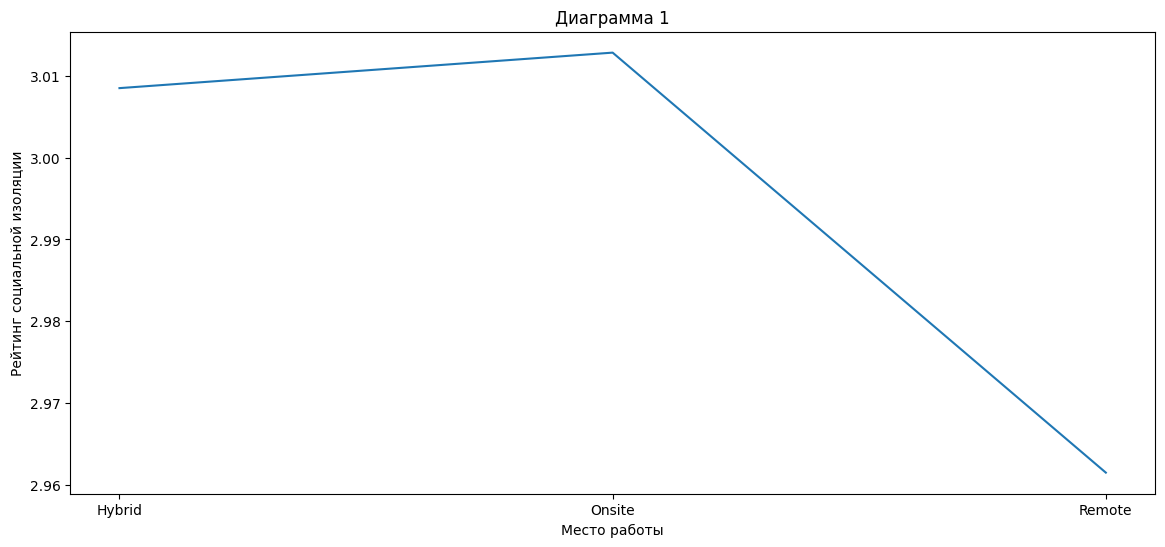

In [252]:
mean_isolation_rating = df_remotework.groupby('Work_Location')['Social_Isolation_Rating'].mean().reset_index()

plt.figure(figsize=(14, 6))

plt.plot(mean_isolation_rating['Work_Location'], mean_isolation_rating['Social_Isolation_Rating'])

plt.title("Диаграмма 1")
plt.xlabel("Место работы")
plt.ylabel("Рейтинг социальной изоляции")

plt.show()

Между атрибутами присутствует связь. Пример, на диаграмме 1 - связь между местом работы и рейтингом социальной изоляции\
\
Примеры бизнес-целей:\
    1. Прогнозирование изменения продуктивности на основе опыта работы и уровня стресса\
    2. Прогнозирование ментального состояния на основе рейтинга баланса между работой и жизнью\
\
Эффект для бизнеса: влияние ментального состояния на продуктивность, влияние качества сна и количества часов работы в неделю на ментальное состояние\
\
\
Цели технического проекта:\
    1. Первая бизнес-цель: вход - опыт работы, уровень стресса, целевой признак - изменение продуктивности.\
    2. Вторая бизнес-цель: вход - рейтинг баланса между работой и жизнью, целевой признак - ментальное состояние.

Проверим на выбросы

In [305]:
null_values = df_remotework.isnull().sum()
print("Пустые значения по столбцам:")
print(null_values)

duplicates = df_remotework.duplicated().sum()
print(f"\nКоличество дубликатов: {duplicates}")

print("\nСтатистический обзор данных:")
df_remotework.describe()

Пустые значения по столбцам:
Employee_ID                             0
Age                                     0
Gender                                  0
Job_Role                                0
Industry                                0
Years_of_Experience                     0
Work_Location                           0
Hours_Worked_Per_Week                   0
Number_of_Virtual_Meetings              0
Work_Life_Balance_Rating                0
Stress_Level                            0
Mental_Health_Condition              1196
Access_to_Mental_Health_Resources       0
Productivity_Change                     0
Social_Isolation_Rating                 0
Satisfaction_with_Remote_Work           0
Company_Support_for_Remote_Work         0
Physical_Activity                    1629
Sleep_Quality                           0
Region                                  0
dtype: int64

Количество дубликатов: 0

Статистический обзор данных:


Age  Years_of_Experience  Hours_Worked_Per_Week  \
count  5000.000000          5000.000000            5000.000000   
mean     40.995000            17.810200              39.614600   
std      11.296021            10.020412              11.860194   
min      22.000000             1.000000              20.000000   
25%      31.000000             9.000000              29.000000   
50%      41.000000            18.000000              40.000000   
75%      51.000000            26.000000              50.000000   
max      60.000000            35.000000              60.000000   

       Number_of_Virtual_Meetings  Work_Life_Balance_Rating  \
count                 5000.000000               5000.000000   
mean                     7.559000                  2.984200   
std                      4.636121                  1.410513   
min                      0.000000                  1.000000   
25%                      4.000000                  2.000000   
50%                      8.000000                  3.000000   
75%                     12.000000                  4.000000   
max                     15.000000                  5.000000   

       Social_Isolation_Rating  Company_Support_for_Remote_Work  
count              5000.000000                      5000.000000  
mean                  2.993800                         3.007800  
std                   1.394615                         1.399046  
min                   1.000000                         1.000000  
25%                   2.000000                         2.000000  
50%                   3.000000                         3.000000  
75%                   4.000000                         4.000000  
max                   5.000000                         5.000000

Видим, что есть пустые данные, но нет дубликатов. Удаляем их

In [306]:
cleaned_df_remotework = drop_missing_values(df_remotework, "RemoteWork")

В наборе данных 'RemoteWork' было удалено 2423 строк с пустыми значениями.


Рассчитаем коэффицент ассиметрии

In [307]:
for column in cleaned_df_remotework.select_dtypes(include=[np.number]).columns:
    skewness = cleaned_df_remotework[column].skew()
    print(f"\nКоэффициент асимметрии для столбца '{column}': {skewness}")


Коэффициент асимметрии для столбца 'Age': -0.0039235316463557286

Коэффициент асимметрии для столбца 'Years_of_Experience': 0.017598366445551735

Коэффициент асимметрии для столбца 'Hours_Worked_Per_Week': 0.044648255942281

Коэффициент асимметрии для столбца 'Number_of_Virtual_Meetings': 0.013099681093504066

Коэффициент асимметрии для столбца 'Work_Life_Balance_Rating': -0.005133932183379798

Коэффициент асимметрии для столбца 'Social_Isolation_Rating': 0.00804653798135057

Коэффициент асимметрии для столбца 'Company_Support_for_Remote_Work': 0.0032439806320526494


Видим, что выбросы незначительные

Очистка данных от шумов

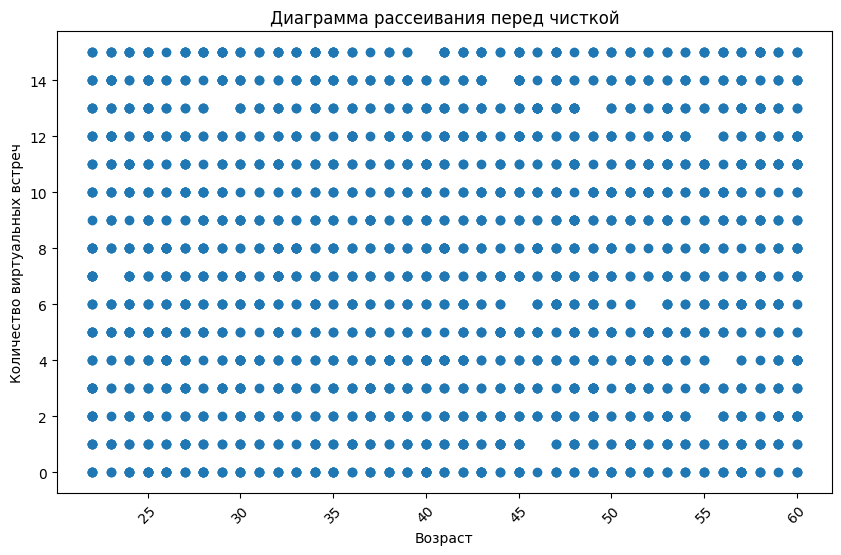

Выбросы в датасете:
Empty DataFrame
Columns: [Employee_ID, Age, Gender, Job_Role, Industry, Years_of_Experience, Work_Location, Hours_Worked_Per_Week, Number_of_Virtual_Meetings, Work_Life_Balance_Rating, Stress_Level, Mental_Health_Condition, Access_to_Mental_Health_Resources, Productivity_Change, Social_Isolation_Rating, Satisfaction_with_Remote_Work, Company_Support_for_Remote_Work, Physical_Activity, Sleep_Quality, Region]
Index: []


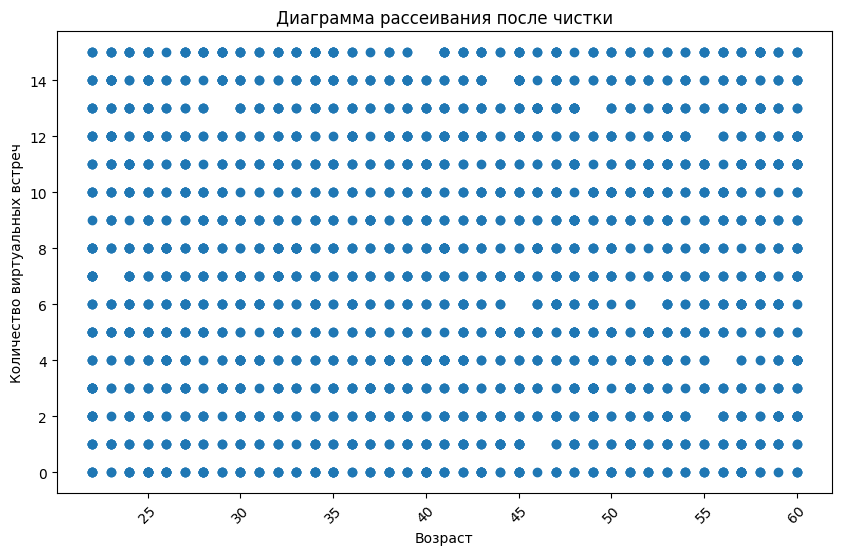

In [308]:
plt.figure(figsize=(10, 6))
plt.scatter(cleaned_df_remotework['Age'], cleaned_df_remotework['Number_of_Virtual_Meetings'])
plt.xlabel('Возраст')
plt.ylabel('Количество виртуальных встреч')
plt.xticks(rotation=45)
plt.title('Диаграмма рассеивания перед чисткой')
plt.show()

Q1 = cleaned_df_remotework["Hours_Worked_Per_Week"].quantile(0.25)
Q3 = cleaned_df_remotework["Hours_Worked_Per_Week"].quantile(0.75)

IQR = Q3 - Q1

threshold = 1.5 * IQR
lower_bound = Q1 - threshold
upper_bound = Q3 + threshold

outliers = (cleaned_df_remotework["Hours_Worked_Per_Week"] < lower_bound) | (cleaned_df_remotework["Hours_Worked_Per_Week"] > upper_bound)

print("Выбросы в датасете:")
print(cleaned_df[outliers])

median_score = cleaned_df_remotework["Hours_Worked_Per_Week"].median()
cleaned_df_remotework.loc[outliers, "Hours_Worked_Per_Week"] = median_score

plt.figure(figsize=(10, 6))
plt.scatter(cleaned_df_remotework['Age'], cleaned_df_remotework['Number_of_Virtual_Meetings'])
plt.xlabel('Возраст')
plt.ylabel('Количество виртуальных встреч')
plt.xticks(rotation=45)
plt.title('Диаграмма рассеивания после чистки')
plt.show()

Шумов нет

Разбиение на выборки

In [311]:
train_df, test_df = train_test_split(cleaned_df_remotework, test_size=0.2, random_state=42)

train_df, val_df = train_test_split(train_df, test_size=0.25, random_state=42)

print("Размер обучающей выборки:", len(train_df))
print("Размер контрольной выборки:", len(val_df))
print("Размер тестовой выборки:", len(test_df))

print()

def check_balance(df, name):
    counts = df['Hours_Worked_Per_Week'].value_counts()
    print(f"Распределение оценки характеристик в {name}:")
    print(counts)
    print()

check_balance(train_df, "обучающей выборке")
check_balance(val_df, "контрольной выборке")
check_balance(test_df, "тестовой выборке")

Размер обучающей выборки: 1545
Размер контрольной выборки: 516
Размер тестовой выборки: 516

Распределение оценки характеристик в обучающей выборке:
Hours_Worked_Per_Week
23    49
22    47
28    44
45    42
40    42
32    42
59    41
41    41
34    40
33    40
54    40
24    40
30    39
25    39
56    39
35    39
26    39
49    39
20    39
57    39
27    38
53    38
42    37
31    37
39    37
37    37
46    36
52    36
36    36
55    36
29    35
48    34
50    34
38    34
44    34
47    33
58    33
51    32
21    31
43    29
60    28
Name: count, dtype: int64

Распределение оценки характеристик в контрольной выборке:
Hours_Worked_Per_Week
37    19
25    18
33    17
44    17
22    17
57    16
41    16
45    15
36    15
27    15
34    14
56    14
23    14
53    14
48    14
39    14
32    14
52    14
24    13
21    13
43    13
28    12
42    12
50    12
38    12
55    12
29    12
60    11
46    10
59    10
20    10
58    10
51    10
26    10
49    10
54     9
31     9
35     9
47     8
30

Оверсемплинг и андерсемплинг

In [312]:
train_df_oversampled = oversample(train_df, 'Hours_Worked_Per_Week')
val_df_oversampled = oversample(val_df, 'Hours_Worked_Per_Week')
test_df_oversampled = oversample(test_df, 'Hours_Worked_Per_Week')

train_df_undersampled = undersample(train_df, 'Hours_Worked_Per_Week')
val_df_undersampled = undersample(val_df, 'Hours_Worked_Per_Week')
test_df_undersampled = undersample(test_df, 'Hours_Worked_Per_Week')

print("Оверсэмплинг:")
check_balance(train_df_oversampled, "обучающей выборке")
check_balance(val_df_oversampled, "контрольной выборке")
check_balance(test_df_oversampled, "тестовой выборке")

print("Андерсэмплинг:")
check_balance(train_df_undersampled, "обучающей выборке")
check_balance(val_df_undersampled, "контрольной выборке")
check_balance(test_df_undersampled, "тестовой выборке")

Оверсэмплинг:
Распределение оценки характеристик в обучающей выборке:
Hours_Worked_Per_Week
43    49
48    49
31    49
45    49
42    49
35    49
50    49
23    49
36    49
38    49
27    49
37    49
60    49
34    49
53    49
58    49
24    49
56    49
32    49
39    49
46    49
40    49
57    49
59    49
21    49
41    49
52    49
55    49
25    49
26    49
29    49
54    49
33    49
47    49
49    49
44    49
28    49
51    49
22    49
30    49
20    49
Name: count, dtype: int64

Распределение оценки характеристик в контрольной выборке:
Hours_Worked_Per_Week
24    19
46    19
39    19
43    19
48    19
22    19
30    19
32    19
20    19
60    19
52    19
33    19
57    19
36    19
51    19
40    19
31    19
45    19
27    19
50    19
38    19
58    19
53    19
55    19
34    19
29    19
49    19
41    19
35    19
28    19
21    19
23    19
37    19
56    19
25    19
47    19
44    19
42    19
54    19
59    19
26    19
Name: count, dtype: int64

Распределение оценки характеристик в